In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

In [4]:
bank_cluster = pd.read_csv("bank_marketing_part1_Data.csv")

In [5]:
bank_cluster.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837


In [6]:
bank_cluster.shape

(210, 7)

In [7]:
bank_cluster.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   spending                      210 non-null    float64
 1   advance_payments              210 non-null    float64
 2   probability_of_full_payment   210 non-null    float64
 3   current_balance               210 non-null    float64
 4   credit_limit                  210 non-null    float64
 5   min_payment_amt               210 non-null    float64
 6   max_spent_in_single_shopping  210 non-null    float64
dtypes: float64(7)
memory usage: 11.6 KB


In [8]:
bank_cluster.isnull().sum()

spending                        0
advance_payments                0
probability_of_full_payment     0
current_balance                 0
credit_limit                    0
min_payment_amt                 0
max_spent_in_single_shopping    0
dtype: int64

In [9]:
bank_cluster.describe().T

,count,mean,std,min,25%,50%,75%,max
spending,210.0,14.847524,2.909699,10.5900,12.27000,14.35500,17.305000,21.1800
advance_payments,210.0,14.559286,1.305959,12.4100,13.45000,14.32000,15.715000,17.2500
probability_of_full_payment,210.0,0.870999,0.023629,0.8081,0.85690,0.87345,0.887775,0.9183
current_balance,210.0,5.628533,0.443063,4.8990,5.26225,5.52350,5.979750,6.6750
credit_limit,210.0,3.258605,0.377714,2.6300,2.94400,3.23700,3.561750,4.0330
min_payment_amt,210.0,3.700201,1.503557,0.7651,2.56150,3.59900,4.768750,8.4560
max_spent_in_single_shopping,210.0,5.408071,0.491480,4.5190,5.04500,5.22300,5.877000,6.5500


In [10]:
duplicate = bank_cluster.duplicated()
print('Number of duplicate rows = %d' % (duplicate.sum()))

Number of duplicate rows = 0


C:\Users\ldudi2\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ldudi2\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ldudi2\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-

<AxesSubplot:xlabel='max_spent_in_single_shopping', ylabel='Density'>

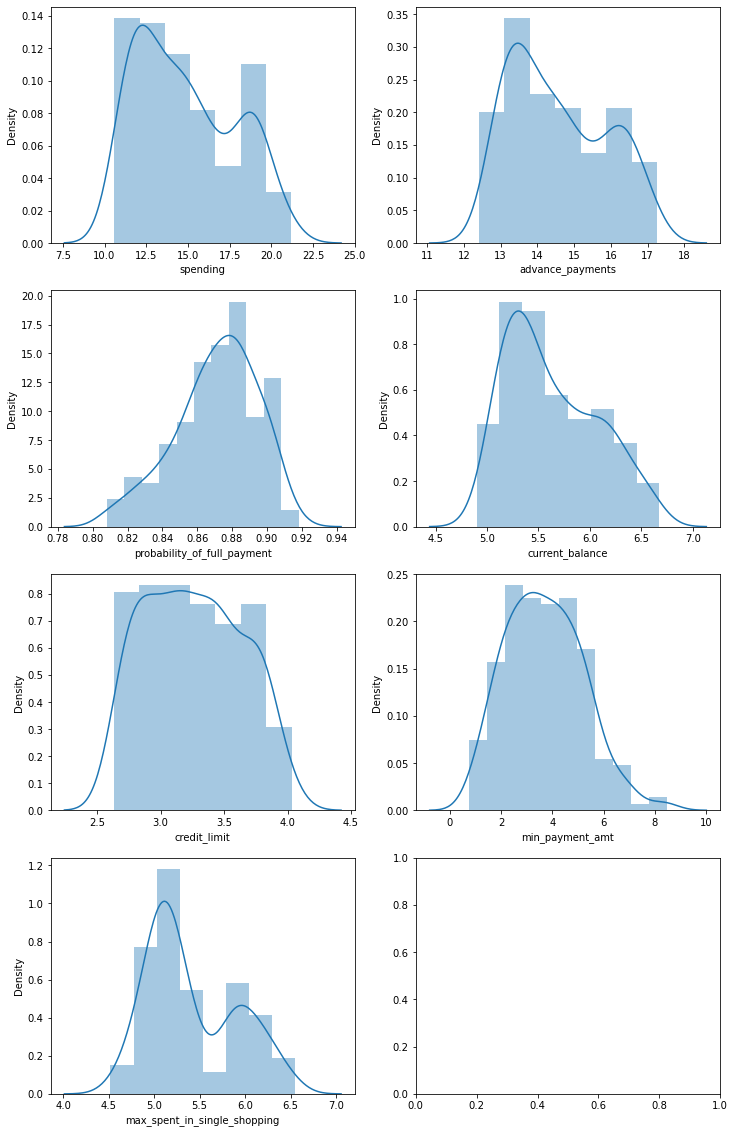

In [11]:
fig, axes = plt.subplots(nrows= 4,ncols=2)
fig.set_size_inches(12, 20)
sns.distplot(bank_cluster['spending'] , ax=axes[0][0])
sns.distplot(bank_cluster['advance_payments'] , ax=axes[0][1])
sns.distplot(bank_cluster['probability_of_full_payment'] , ax=axes[1][0])
sns.distplot(bank_cluster['current_balance'] , ax=axes[1][1])
sns.distplot(bank_cluster['credit_limit'] , ax=axes[2][0])
sns.distplot(bank_cluster['min_payment_amt'] , ax=axes[2][1])
sns.distplot(bank_cluster['max_spent_in_single_shopping'] , ax=axes[3][0])

<AxesSubplot:>

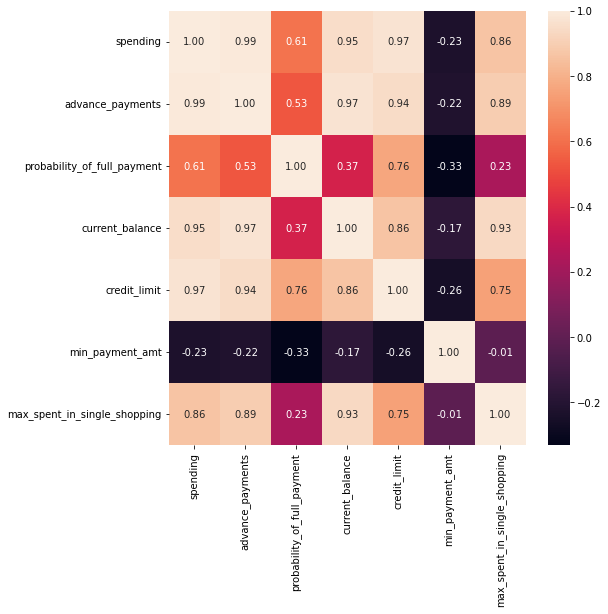

In [46]:
plt.figure(figsize=(8,8))
sns.heatmap(bank_cluster.corr(), annot=True, fmt= '.2f')

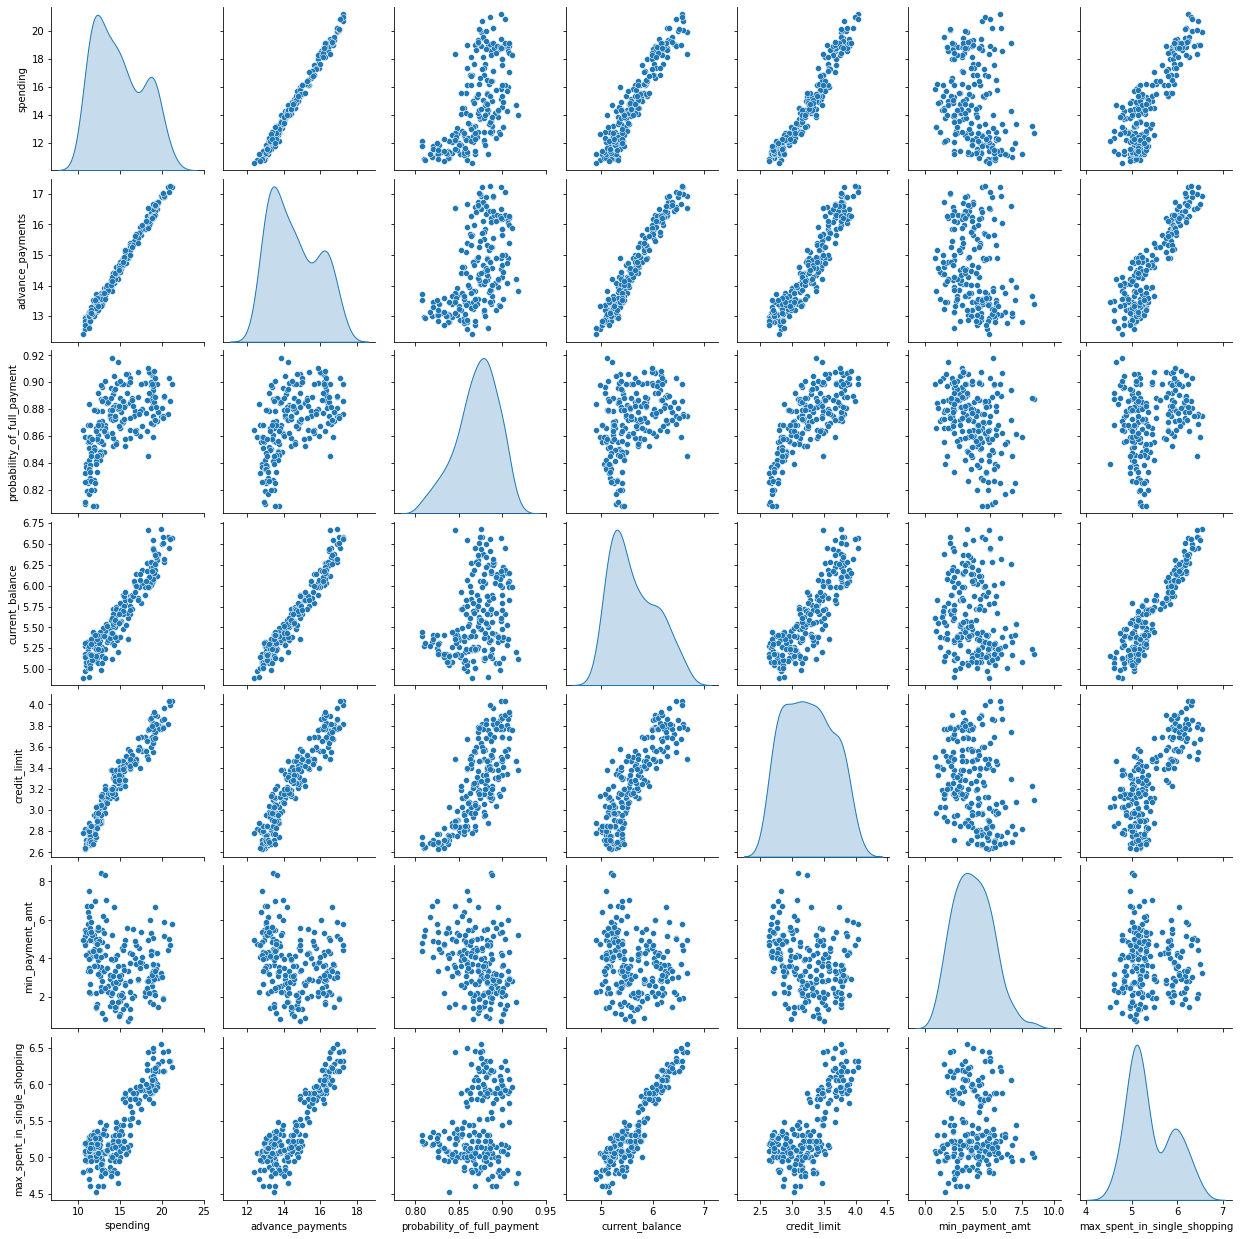

In [47]:
sns.pairplot(bank_cluster, diag_kind='kde')

In [48]:
from sklearn.preprocessing import StandardScaler

In [49]:
X = StandardScaler()

In [50]:
scaled_cluster = pd.DataFrame(X.fit_transform(bank_cluster), columns=bank_cluster.columns)

In [51]:
scaled_cluster.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,1.754355,1.811968,0.178230,2.367533,1.338579,-0.298806,2.328998
1,0.393582,0.253840,1.501773,-0.600744,0.858236,-0.242805,-0.538582
2,1.413300,1.428192,0.504874,1.401485,1.317348,-0.221471,1.509107
3,-1.384034,-1.227533,-2.591878,-0.793049,-1.639017,0.987884,-0.454961
4,1.082581,0.998364,1.196340,0.591544,1.155464,-1.088154,0.874813


In [52]:
scaled_clust.describe()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters1
count,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02,210.000000
mean,9.148766e-16,1.097006e-16,1.243978e-15,-1.089076e-16,-2.994298e-16,5.302637e-16,-1.935489e-15,2.295238
std,1.002389e+00,1.002389e+00,1.002389e+00,1.002389e+00,1.002389e+00,1.002389e+00,1.002389e+00,1.225126
min,-1.466714e+00,-1.649686e+00,-2.668236e+00,-1.650501e+00,-1.668209e+00,-1.956769e+00,-1.813288e+00,1.000000
25%,-8.879552e-01,-8.514330e-01,-5.980791e-01,-8.286816e-01,-8.349072e-01,-7.591477e-01,-7.404953e-01,1.000000
50%,-1.696741e-01,-1.836639e-01,1.039927e-01,-2.376280e-01,-5.733534e-02,-6.746852e-02,-3.774588e-01,2.000000
75%,8.465989e-01,8.870693e-01,7.116771e-01,7.945947e-01,8.044956e-01,7.123789e-01,9.563941e-01,4.000000
max,2.181534e+00,2.065260e+00,2.006586e+00,2.367533e+00,2.055112e+00,3.170590e+00,2.328998e+00,4.000000


## Hierarchial Clustering Methods

In [53]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [54]:
wardlink = linkage(scaled_cluster, method = 'ward')

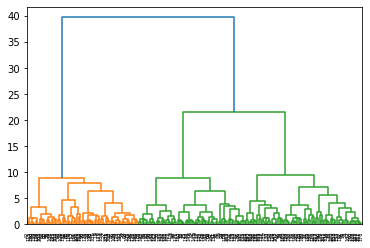

In [55]:
dend = dendrogram(wardlink)

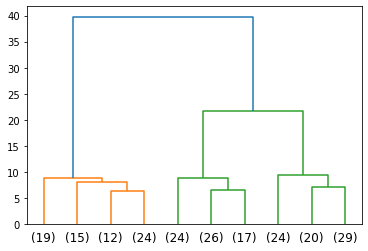

In [56]:
dend = dendrogram(wardlink,
                 truncate_mode='lastp',
                 p = 10,
                 )

In [57]:
from scipy.cluster.hierarchy import fcluster

In [58]:
clusters = fcluster(wardlink, 3, criterion='maxclust')
clusters

array([1, 3, 1, 2, 1, 2, 2, 3, 1, 2, 1, 3, 2, 1, 3, 2, 3, 2, 3, 2, 2, 2,
       1, 2, 3, 1, 3, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 1, 1, 3, 1, 1,
       2, 2, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 3, 2, 2, 3, 3, 1,
       1, 3, 1, 2, 3, 2, 1, 1, 2, 1, 3, 2, 1, 3, 3, 3, 3, 1, 2, 3, 3, 1,
       1, 2, 3, 1, 3, 2, 2, 1, 1, 1, 2, 1, 2, 1, 3, 1, 3, 1, 1, 2, 2, 1,
       3, 3, 1, 2, 2, 1, 3, 3, 2, 1, 3, 2, 2, 2, 3, 3, 1, 2, 3, 3, 2, 3,
       3, 1, 2, 1, 1, 2, 1, 3, 3, 3, 2, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 3,
       3, 3, 3, 2, 3, 1, 1, 2, 1, 1, 1, 2, 1, 3, 3, 3, 3, 2, 3, 1, 1, 1,
       3, 3, 1, 2, 3, 3, 3, 3, 1, 1, 3, 3, 3, 2, 3, 3, 2, 1, 3, 1, 1, 2,
       1, 2, 3, 1, 3, 2, 1, 3, 1, 3, 1, 3], dtype=int32)

In [59]:
scaled_cluster['clusters'] = clusters

In [60]:
scaled_cluster.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters
0,1.754355,1.811968,0.178230,2.367533,1.338579,-0.298806,2.328998,1
1,0.393582,0.253840,1.501773,-0.600744,0.858236,-0.242805,-0.538582,3
2,1.413300,1.428192,0.504874,1.401485,1.317348,-0.221471,1.509107,1
3,-1.384034,-1.227533,-2.591878,-0.793049,-1.639017,0.987884,-0.454961,2
4,1.082581,0.998364,1.196340,0.591544,1.155464,-1.088154,0.874813,1


In [61]:
scaled_cluster.clusters.value_counts().sort_index()

1    70
2    67
3    73
Name: clusters, dtype: int64

In [62]:
aggdata=scaled_cluster.groupby('clusters').mean()
aggdata['Freq']=scaled_cluster.clusters.value_counts().sort_index()
aggdata

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Freq
clusters,,,,,,,,
1,1.213983,1.217445,0.568505,1.198256,1.130594,-0.040697,1.242686,70
2,-1.024932,-0.999559,-0.972589,-0.881418,-1.088249,0.832836,-0.583025,67
3,-0.223402,-0.250010,0.347508,-0.340041,-0.085328,-0.725360,-0.656511,73


## Average Method

In [63]:
wardlink1 = linkage(scaled_cluster, method = 'average')

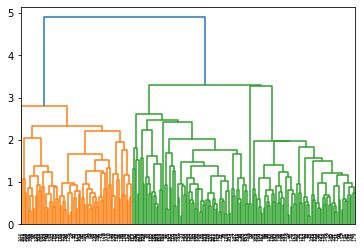

In [64]:
dend1 = dendrogram(wardlink1)

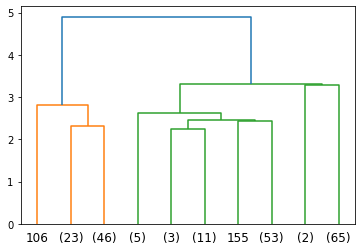

In [65]:
dend1 = dendrogram(wardlink1,
                 truncate_mode='lastp',
                 p = 10,
                 )

In [66]:
clusters1 = fcluster(wardlink1, 3, criterion='distance')
clusters1

array([1, 2, 1, 4, 1, 3, 4, 2, 1, 4, 1, 2, 4, 1, 2, 4, 2, 4, 2, 4, 4, 4,
       1, 4, 2, 1, 2, 4, 4, 4, 2, 4, 4, 2, 4, 4, 4, 4, 4, 1, 1, 2, 1, 1,
       4, 4, 2, 1, 1, 1, 4, 1, 1, 1, 1, 1, 4, 4, 4, 1, 2, 4, 4, 2, 2, 1,
       1, 2, 1, 4, 2, 4, 1, 1, 4, 1, 2, 4, 1, 2, 2, 2, 2, 1, 4, 2, 2, 1,
       1, 3, 2, 1, 2, 4, 4, 1, 1, 1, 4, 1, 4, 1, 2, 1, 2, 1, 1, 4, 4, 1,
       2, 2, 1, 4, 4, 1, 2, 2, 4, 1, 2, 4, 4, 4, 2, 2, 1, 4, 2, 2, 4, 2,
       2, 1, 4, 1, 1, 4, 1, 2, 2, 2, 4, 4, 2, 4, 1, 4, 2, 4, 2, 4, 2, 2,
       2, 2, 2, 4, 2, 1, 1, 4, 1, 1, 1, 4, 1, 2, 2, 2, 2, 4, 2, 1, 1, 1,
       2, 2, 1, 4, 2, 2, 2, 2, 1, 1, 2, 2, 2, 4, 2, 2, 4, 1, 2, 1, 1, 4,
       1, 4, 2, 1, 2, 4, 1, 2, 1, 2, 1, 2], dtype=int32)

In [67]:
scaled_cluster['clusters1'] = clusters1

In [68]:
scaled_cluster.clusters1.value_counts().sort_index()

1    70
2    73
3     2
4    65
Name: clusters1, dtype: int64

In [69]:
aggdata1=scaled_cluster.groupby('clusters1').mean()
aggdata1['Freq']=scaled_cluster.clusters1.value_counts().sort_index()
aggdata1

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters,Freq
clusters1,,,,,,,,,
1,1.213983,1.217445,0.568505,1.198256,1.130594,-0.040697,1.242686,1.0,70
2,-0.223402,-0.250010,0.347508,-0.340041,-0.085328,-0.725360,-0.656511,3.0,73
3,-0.653696,-0.786191,0.714859,-0.948024,-0.257699,3.123589,-0.775167,2.0,2
4,-1.036355,-1.006124,-1.024511,-0.879368,-1.113804,0.762352,-0.577113,2.0,65


## Creating Clusters using KMeans

In [75]:
scaled_cluster = pd.DataFrame(X.fit_transform(bank_cluster), columns=bank_cluster.columns)

In [76]:
k_means = KMeans(n_clusters = 3,random_state=1)

In [77]:
k_means.fit(scaled_clust)

KMeans(n_clusters=3, random_state=1)

In [78]:
k_means.labels_

array([1, 2, 1, 0, 1, 0, 0, 2, 1, 0, 1, 2, 0, 1, 2, 0, 2, 0, 2, 0, 0, 0,
       1, 0, 2, 1, 2, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1,
       0, 0, 2, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 2, 0, 0, 2, 2, 1,
       1, 2, 1, 0, 2, 0, 1, 1, 0, 1, 2, 0, 1, 2, 2, 2, 2, 1, 0, 2, 1, 1,
       1, 0, 2, 1, 2, 0, 0, 1, 1, 1, 0, 1, 0, 1, 2, 1, 2, 1, 1, 0, 0, 1,
       2, 2, 1, 0, 0, 1, 2, 2, 0, 1, 2, 0, 0, 0, 2, 2, 1, 0, 2, 2, 0, 2,
       2, 1, 0, 1, 1, 0, 1, 2, 2, 2, 0, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 2,
       2, 2, 2, 0, 2, 1, 1, 0, 1, 1, 1, 0, 1, 2, 2, 0, 2, 0, 2, 1, 1, 1,
       2, 2, 1, 0, 2, 2, 2, 2, 1, 1, 2, 2, 2, 0, 2, 2, 0, 1, 2, 1, 1, 0,
       1, 0, 2, 1, 2, 0, 1, 2, 1, 2, 2, 2])

In [79]:
k_means.inertia_

442.1448910851246

In [81]:
k_means = KMeans(n_clusters = 4)
k_means.fit(scaled_cluster)
k_means.inertia_

371.28344766743334

In [82]:
k_means = KMeans(n_clusters = 3)
k_means.fit(scaled_cluster)
k_means.inertia_

430.65897315130064

In [83]:
wss =[]

In [84]:
for i in range(1,11):
    KM = KMeans(n_clusters=i,random_state=1)
    KM.fit(scaled_cluster)
    wss.append(KM.inertia_)

C:\Users\ldudi2\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [85]:
wss

[1469.9999999999995,
 659.1717544870411,
 430.65897315130064,
 371.301721277542,
 327.9608240079031,
 290.5900305968219,
 264.83153087478144,
 240.6837259501598,
 220.85285825594738,
 206.3829103601579]

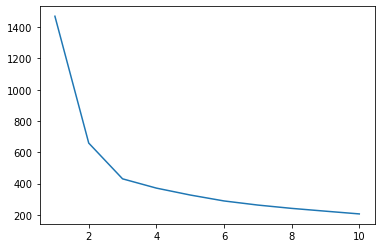

In [107]:
plt.plot(range(1,11), wss)

In [86]:
k_means = KMeans(n_clusters = 3,random_state=1)
k_means.fit(scaled_cluster)
labels = k_means.labels_

In [87]:
silhouette_score(scaled_cluster,labels,random_state=1)

0.40072705527512986

In [88]:
scaled_cluster['k_means'] = labels

In [90]:
scaled_clust.k_means.value_counts().sort_index()

0    72
1    67
2    71
Name: k_means, dtype: int64

In [91]:
final=scaled_clust.groupby('k_means').mean()
final['Freq']=scaled_clust.k_means.value_counts().sort_index()
final.T

k_means,0,1,2
spending,-1.030253,1.256682,-0.141119
advance_payments,-1.006649,1.261966,-0.170043
probability_of_full_payment,-0.964905,0.560464,0.449606
current_balance,-0.897685,1.237883,-0.257814
credit_limit,-1.085583,1.164852,0.001647
min_payment_amt,0.694804,-0.045219,-0.661919
max_spent_in_single_shopping,-0.624809,1.292308,-0.585893
clusters1,3.805556,1.014925,1.971831
Freq,72.000000,67.000000,71.000000
